In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

X, y = X.to_numpy(), y.to_numpy()

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 6


In [2]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,    # for reproducibility
    shuffle=True,       # whether to shuffle the data before splitting
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)  # Mean of each feature
X_std = X_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [3]:
from mlp import *
from utils import *
from loss_functions import *

In [4]:
l = [X_train.shape[1], 64, 32, 1]

layers = [
    Layer(X_train.shape[1], l[1], ReLU(), dropout_rate=0.1),
    Layer(l[1], l[2], ReLU(), dropout_rate=0.1),
    Layer(l[2], l[3], Linear())
]

In [5]:
model = MultilayerPerceptron(layers)
loss_fn = SquaredError()

In [6]:
training_loss, val_loss = model.train(
    X_train, 
    y_train.reshape(-1,1),
    X_val, y_val.reshape(-1,1), 
    loss_fn, 
    batch_size=16, 
    epochs=150, 
    learning_rate=1e-3,
    rmsprop=True
)

-------------------------------------
Epoch: 0, Train Loss: 5.3103634965186854, Validation Loss: 0.4727576266465825
-------------------------------------
Epoch: 1, Train Loss: 2.3914935039518745, Validation Loss: 0.39103412591427283
-------------------------------------
Epoch: 2, Train Loss: 1.9961536074199375, Validation Loss: 0.3045491843669865
-------------------------------------
Epoch: 3, Train Loss: 1.7886199195872539, Validation Loss: 0.2715511181466912
-------------------------------------
Epoch: 4, Train Loss: 1.8376788046726025, Validation Loss: 0.239587513467297
-------------------------------------
Epoch: 5, Train Loss: 1.6533577736721354, Validation Loss: 0.24036833524948029
-------------------------------------
Epoch: 6, Train Loss: 1.5557114004070003, Validation Loss: 0.21977125798490182
-------------------------------------
Epoch: 7, Train Loss: 1.4308213583478546, Validation Loss: 0.21255471676160784
-------------------------------------
Epoch: 8, Train Loss: 1.4072177

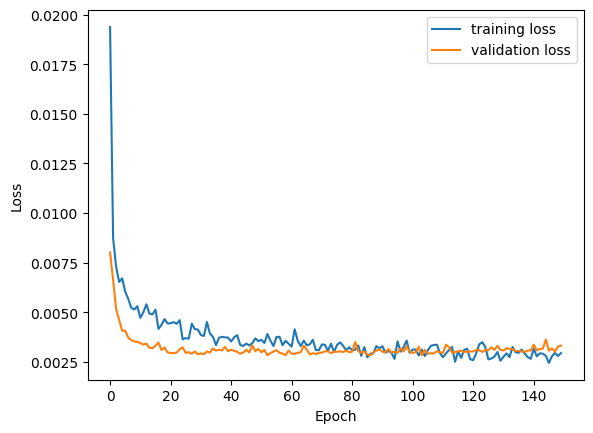

In [7]:
import matplotlib.pyplot as plt

plt.plot(training_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# pick 10 random from x_test
indices = np.random.choice(X_test.shape[0], 10)
X_test_sample = X_test[indices]
y_test_sample = y_test[indices]

# predict
y_pred = model.forward(X_test_sample)


# create table to show the results with two floating points
results = pd.DataFrame({
    'Predicted': y_pred.flatten(),
    'Actual': y_test_sample.flatten()
})
results = results.round(2)
print(results)


   Predicted  Actual
0      -0.56   -1.02
1      -1.23   -1.33
2      -1.50   -1.70
3      -0.82   -0.53
4       1.80    1.55
5       0.19   -0.32
6       1.46    0.77
7       0.11    0.40
8       0.41    0.30
9      -1.12   -1.08
